# iotSDR apply FPGA FFT in MAX recorded IQ samples Notebook:
## PSAS Rcordings from file
## Matlab mat files


## Setting up the environment:

* import required python modules



In [73]:
from pynq import Overlay
import iotSDR_GPS_streamer as iotSDR_GPS_streamer
import max2769_driver as max2769_driver

import time
import os

In [74]:
import matplotlib.pyplot as plt
import numpy as np

from GPSData import IQData

iqfrom = "psas"
iqfrom = "mat"



In [75]:
overlay = Overlay('../bitstream/iotSDR_GPS_Receiver.bit', download=True)
if not overlay.is_loaded():
    overlay.download()
    print("Bitfile now Loaded")
    
#overlay.ip_dict


In [128]:
if iqfrom == "psas":
    # Need these to pass to importFile module
    GPS_fs = 4.092*10**6 # Sampling Frequency [Hz]
    numberOfMilliseconds = 14
    sampleLength = numberOfMilliseconds*10**(-3)
    bytesToSkip = 0#71000000

    data = IQData()
    # Uncomment one of these lines to choose between Launch12 or gps-sdr-sim data

    # /home/evan/Capstone/gps/resources/JGPS@-32.041913222
    data.importFile('../../GPS_Receiver_PSAS_Lauch-12/resources/JGPS@04.559925043', GPS_fs, sampleLength, bytesToSkip)
    """
    Get psas recorded iq samples
    """
    block_size_ms=8
    dataBlock = data.CData[0:(4096*block_size_ms)]
    NsamplesBlock = 4096*block_size_ms
    NsamplesBlock
    dataBlock = dataBlkMat 

else:
    """
    Get matlab generated iq samples
    """

    import scipy.io
    dataBlkMat = scipy.io.loadmat("./FFT_Check_Data.mat")
    dataBlock = dataBlkMat['inp'][0]
    print(dataBlock[:10])

[ 10.-10.j -30.+10.j -30.-10.j  10.+30.j -30.+30.j -10.-10.j -10.-10.j
 -10.-10.j  10.+30.j -10.-10.j]


In [118]:
dataBlock.imag

array([-32767.,  32767., -32767., ..., -32765.,  32767., -32767.])

In [117]:
dataBlock.real = np.int16((dataBlock.real//10) * (2**15 - 1))
dataBlock.imag = np.int16((dataBlock.imag//10) * (2**15 - 1))
dataBlock.imag

array([-32767.,  32767., -32767., ..., -32765.,  32767., -32767.])

array([ 32767.-32767.j, -32765.+32767.j, -32765.-32767.j,  32767.+32765.j,
       -32765.+32765.j, -32767.-32767.j, -32767.-32767.j, -32767.-32767.j,
        32767.+32765.j, -32767.-32767.j])

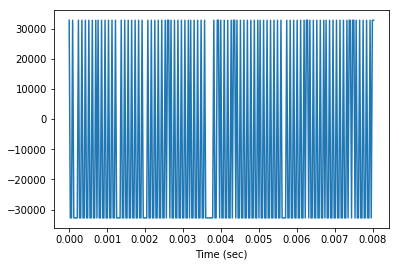

In [119]:
fs = 8*4096.0 # Hz
t = np.arange(0.0, 1.0, 1/fs)

plt.plot(t[:264], dataBlock[:264])
plt.xlabel("Time (sec)")
dataBlock[:10]

In [112]:
import fftpl

FFT_LENGTH = 1 << 15 # 32k
fftpl = fftpl.FFTPL(overlay,FFT_LENGTH) 

[ 32767.-32767.j -32765.+32767.j -32765.-32767.j ...,  32767.-32765.j
 -32767.+32767.j -32767.-32767.j]
[ 32767 -32767 -32765 ...,  32767 -32767 -32767]
0x6aaa
FFT Time(uSec): 1221.17996215820312500000
spectrum  32768


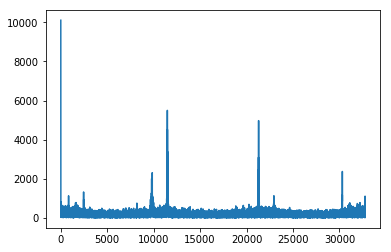

In [122]:
sig_fft_i = fftpl.interleave_iq(dataBlock)
fftpl.fft_config_update(True)
sig_fft_frd = fftpl.fft_ps_samples(sig_fft_i)
sig_fft_frd = fftpl.deinterleave_iq(sig_fft_frd)
print("spectrum ", len(sig_fft_frd))

ps = np.abs(sig_fft_frd)
plt.plot(np.abs(sig_fft_frd))


In [81]:
max = np.max(ps)
#Index of the Maximum element
conditon = (ps == max)
result = np.where(conditon)
print("Arrays for the max element:",result)
print("List for the maximum value indexes:",result[0]*2)

Arrays for the max element: (array([0], dtype=int32),)
List for the maximum value indexes: [0]
